<a href="https://colab.research.google.com/github/kude0930/DeepLearning_B/blob/main/%EB%B0%B1%EA%B2%AC%EB%B6%88%EC%97%AC%EC%9D%BC%ED%83%80_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%9E%85%EB%AC%B8_with_Tensorflow_2_x_Ch_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **5.1 일단 사용해보기**

In [ ]:
# 데이터 살펴보기
from tensorflow.keras.datasets import fashion_mnist

#  데이터 다운
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9

# 0~59999의 범위에서 무작위로 세 개의 정수를 뽑는다.
random_idx = np.random.randint(60000, size = sample_size)

# 0~1 범위로 만든다.
x_train = np.reshape(x_train / 255, (-1, 28, 28, 1))
x_test = np.reshape(x_test / 255, (-1, 28, 28, 1))

from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태로 변경
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 검증 데이터셋을 만든다.
from sklearn.model_selection import train_test_split

# 학습/테스트 데이터를 0.7/0.3의 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)

print('Fashion-MNIST ready~')

4423680/4422102 [==============================] - 0s 0us/step
Fashion-MNIST ready~


In [ ]:
# 모델 구성하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

model = Sequential([Conv2D(filters = 16, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)), MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'), MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'), MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), Flatten(), Dense(64, activation = 'relu'), Dense(10, activation = 'softmax')])

In [ ]:
# 모델 학습시키기
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

model.fit(x_train, y_train, epochs = 30, batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 34s 100ms/step - loss: 0.6615 - acc: 0.7618 - val_loss: 0.4315 - val_acc: 0.8445
Epoch 2/30
329/329 [==============================] - 33s 99ms/step - loss: 0.3986 - acc: 0.8555 - val_loss: 0.3517 - val_acc: 0.8707
Epoch 3/30
329/329 [==============================] - 33s 99ms/step - loss: 0.3420 - acc: 0.8763 - val_loss: 0.3791 - val_acc: 0.8579
Epoch 4/30
329/329 [==============================] - 33s 99ms/step - loss: 0.3129 - acc: 0.8878 - val_loss: 0.3396 - val_acc: 0.8779
Epoch 5/30
329/329 [==============================] - 33s 99ms/step - loss: 0.2941 - acc: 0.8933 - val_loss: 0.2947 - val_acc: 0.8978
Epoch 6/30
329/329 [==============================] - 33s 99ms/step - loss: 0.2721 - acc: 0.9011 - val_loss: 0.3141 - val_acc: 0.8879
Epoch 7/30
329/329 [==============================] - 33s 99ms/step - loss: 0.2563 - acc: 0.9075 - val_loss: 0.2709 - val_acc: 0.9033
Epoch 8/30
329/329 [==============================] - 32s 99m

# **5.2 컨볼루션층과 풀링층**

**5.2.1 컨볼루션층을 사용하는 이유**

완전 연결층과의 차이

*   단순히 데이터를 펼쳐서 사용하기 때문에 각 이미지 픽셀의 관계를 고려하지 않는다.
*   2차원 배열 형태의 데이터(28, 28)를 1차원 배열 형태의 데이터(28 * 28)로 변환하면서 본래 데이터의 특징을 잃어버리게 된다.


컨볼루션 필터

*   얼굴 변형의 목적을 가진 이미지 필터는 이미지의 선명함을 목적으로 하는 필터로써 사용할 수 없다. 즉, 두 가지 목적으로 동시에 달성하려면 독립적으로 각각의 필터를 직접 정의해 주어야 한다.
*   컨볼루션 필터는 모델의 학습을 통해 필터의 파라미터가 목적에 맞게끔 조정된다. 학습된 모델을 사용하면 얼굴 변형, 선명함 등의 목적을 동시에 사용할 수 있다.



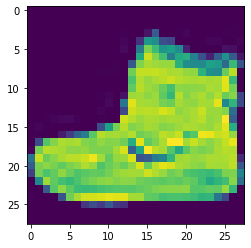

In [ ]:
# 이미지 필터 사용해보기
from tensorflow.keras.datasets import fashion_mnist

# 데이터 다운
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [ ]:
# 이미지 필터 정의하기
import numpy as np
import cv2

# 가로축을 추출하기 위한 필터
horizontal_filter = np.array([[1., 2., 1.], [0., 0., 0.], [-1., -2., -1.]])

# 세로선을 추출하기 위한 필터
vertical_filter = np.array([[1., 0., -1.], [2., 0., -2.], [1., 0., -1.]])

# 계산의 편의를 위해 이미지의 형태를 (27, 27)로 줄인다.
test_image = cv2.resize(x_train[0], (27, 27))
image_size = test_image.shape[0]
output_size = int((image_size - 3) / 1 + 1)
print('output의 크기 : %d' % output_size)

output의 크기 : 25


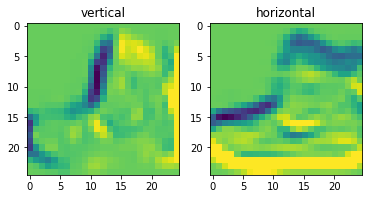

In [ ]:
# 이미지 필터 적용하기
filter_size = 3

def get_filtered_image(filter) :
  filtered_image = np.zeros((output_size, output_size))
  for i in range(output_size) :
    for j in range(output_size) :
      # 컨볼루션 연산
      indice_image = test_image[i : (i + filter_size), j : (j + filter_size)] * filter
      indice_sum = np.sum(indice_image)

      if(indice_sum > 255) :
        indice_sum = 255

      filtered_image[i, j] = indice_sum

  return filtered_image

vertical_filtered_image = get_filtered_image(vertical_filter)
horizontal_filtered_image = get_filtered_image(horizontal_filter)

plt.subplot(1, 2, 1)
plt.title('vertical')
plt.imshow(vertical_filtered_image)

plt.subplot(1, 2, 2)
plt.title('horizontal')
plt.imshow(horizontal_filtered_image)

plt.show()

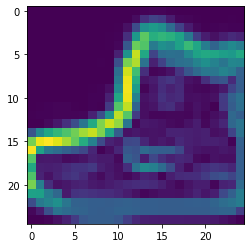

In [ ]:
# 이미지 필터를 적용한 최종 결과
sobel_image = np.sqrt(np.square(horizontal_filtered_image) + np.square(vertical_filtered_image))

plt.imshow(sobel_image)

**5.2.2 컨볼루션 알아보기**

*   컨볼루션 연산
*   스트라이드
*   패딩





**5.2.3 풀링 연산 알아보기**

장점

*   모델이 물체의 주요한 특징을 학습할 수 있도록 도와주며, 컨볼루션 신경망이 이동 불변성 특성을 가지도록 한다. 이동 불변성은 물체가 어느 위치에 있어도 그 물체를 인식할 수 있다는 것을 말한다.그 외에도 크기 불변성, 회전 불변성 등과 같은 특징이 있지만, 이에 대해서는 취약점을 가지고 있다. 이를 해결하기 위해서 일반적으로 데이터 증식 방법을 활용한다.
*   모델 파라미터 수를 줄여준다. 이는 곧 계산 속도 향상과도 연관이 있으며, 과대적합 문제에 노출될 위험을 줄여준다.



original image shape : (28, 28)
pooled image shape : (14, 14)


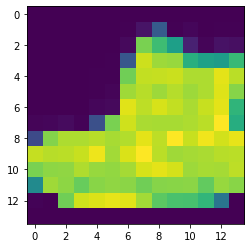

In [ ]:
# 풀링 연산 구현하기
import numpy as np

image = x_train[0]
image_x = image.shape[0]
image_y = image.shape[1]
new_image_x = int(image_x / 2)
new_image_y = int(image_y / 2)

pooled_image = np.zeros((new_image_x, new_image_y))

print(f'original image shape : ({image_x}, {image_y})')
print(f'pooled image shape : ({new_image_x}, {new_image_y})')

for x in range(0, image_x, 2) :
  for y in range(0, image_y, 2) :
    pooled_image[int(x / 2), int(y / 2)] = np.max(image[x:x + 2, y:y + 2])

plt. imshow(pooled_image)

In [ ]:
# model.summary() 함수 사용하기
model.summary() # 모델의 구조를 확인한다.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

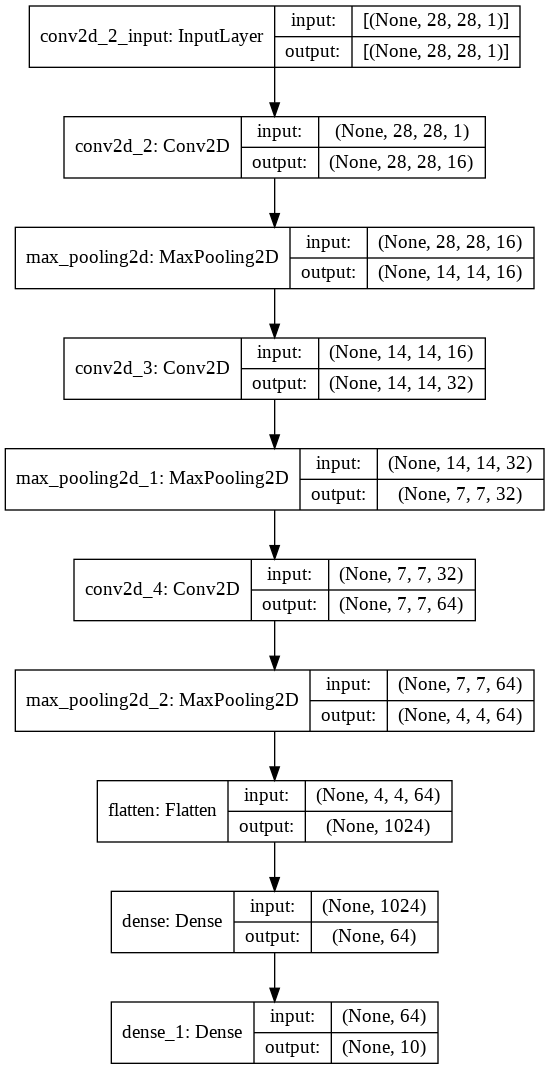

In [ ]:
# plot_model() 함수 사용하기
# 6번 각주의 해결 방법을 써도 문제가 해결되지 않는다면, 다음 코드의 주석을 풀어 실행
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

from tensorflow.keras.utils import plot_model
plot_model(model, './model.png', show_shapes = True)

# **5.3 CIFAR-10 살펴보기**

**5.3.1 데이터 살펴보기**

In [ ]:
# CIFAR-10 데이터셋 다운받기
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


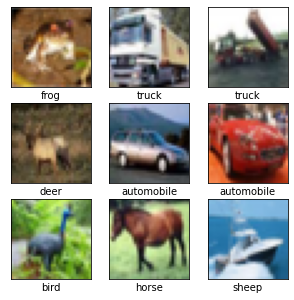

In [ ]:
# CIFAR-10 데이터 그려보기
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']

sample_size = 9
random_idx = np.random.randint(60000, size = sample_size)

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx) :
  plt.subplot(3, 3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = 'gray')
  plt.xlabel(class_names[int(y_train[i])])

plt.show()

In [ ]:
# CIFAR-10 데이터셋 전처리 과정
# 평균과 표준 편차는 채널별로 구해준다.
x_mean = np.mean(x_train, axis = (0, 1, 2))
x_std = np.std(x_train, axis = (0, 1, 2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000


**5.3.2 모델 구성하기**

In [ ]:
# CIFAR-10 모델 구성하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()

# (32, 32, 3)의 데이터를 입력으로 받는다.
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 128)        

**5.3.3 모델 학습하기**

In [ ]:
# CIFAR-10 모델 학습하기

# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs = 30, batch_size = 32, validation_data = (x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 287s 263ms/step - loss: 0.6942 - acc: 0.7616 - val_loss: 0.8210 - val_acc: 0.7192
Epoch 2/30
1094/1094 [==============================] - 286s 261ms/step - loss: 0.6180 - acc: 0.7874 - val_loss: 0.8041 - val_acc: 0.7220
Epoch 3/30
1094/1094 [==============================] - 285s 260ms/step - loss: 0.5549 - acc: 0.8069 - val_loss: 0.7800 - val_acc: 0.7279
Epoch 4/30
1094/1094 [==============================] - 285s 261ms/step - loss: 0.4820 - acc: 0.8327 - val_loss: 0.8581 - val_acc: 0.7223
Epoch 5/30
1094/1094 [==============================] - 286s 261ms/step - loss: 0.4224 - acc: 0.8546 - val_loss: 0.8050 - val_acc: 0.7397
Epoch 6/30
1094/1094 [==============================] - 285s 261ms/step - loss: 0.3601 - acc: 0.8758 - val_loss: 0.8346 - val_acc: 0.7405
Epoch 7/30
1094/1094 [==============================] - 288s 263ms/step - loss: 0.3063 - acc: 0.8936 - val_loss: 0.8719 - val_acc: 0.7386
Epoch 8/30
1094/1094 [============

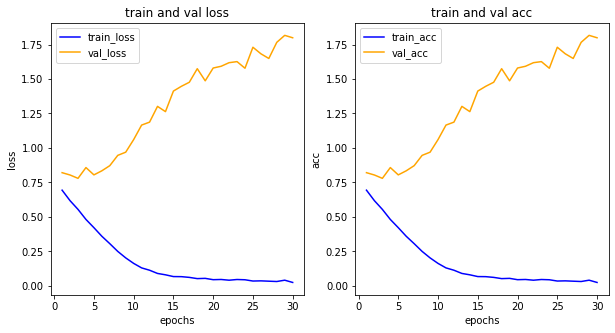

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, loss, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_loss, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


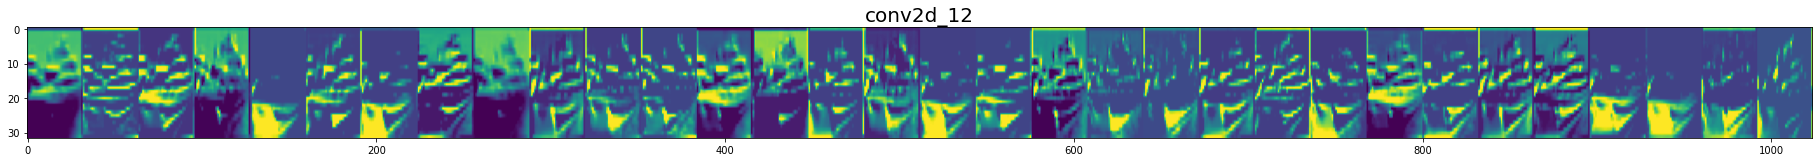

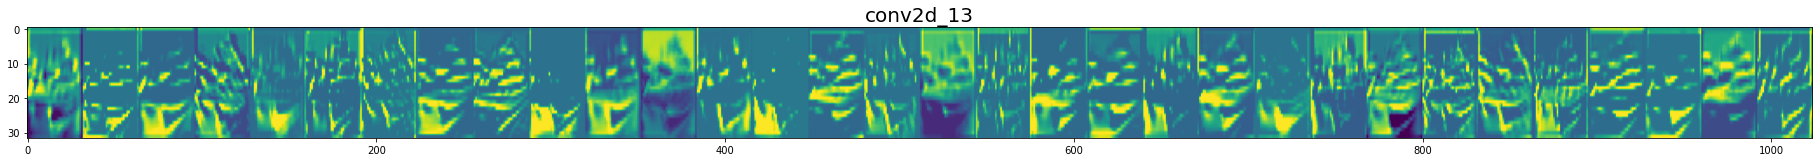

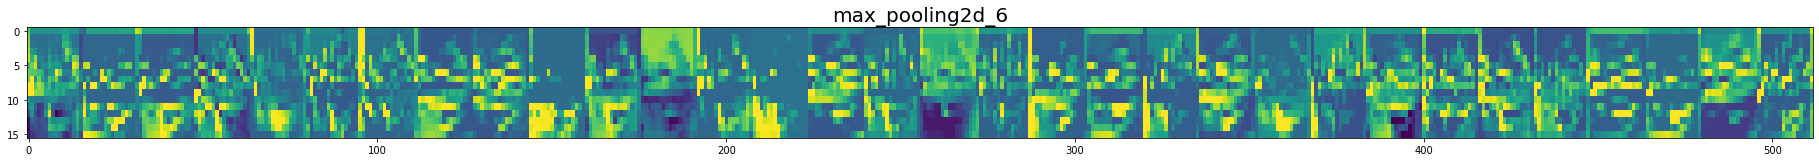

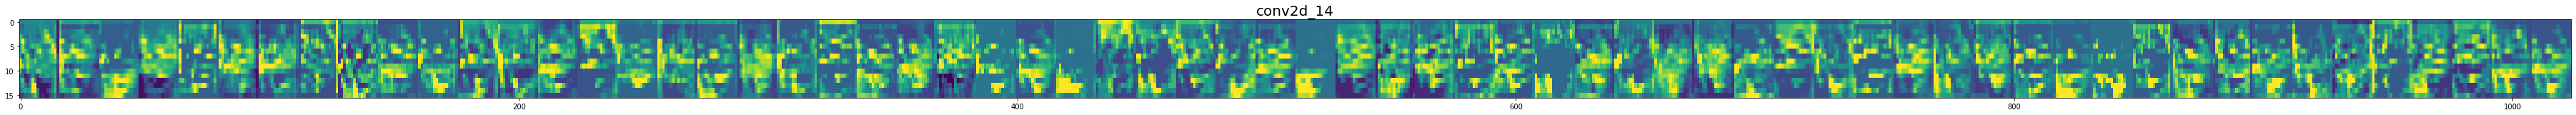

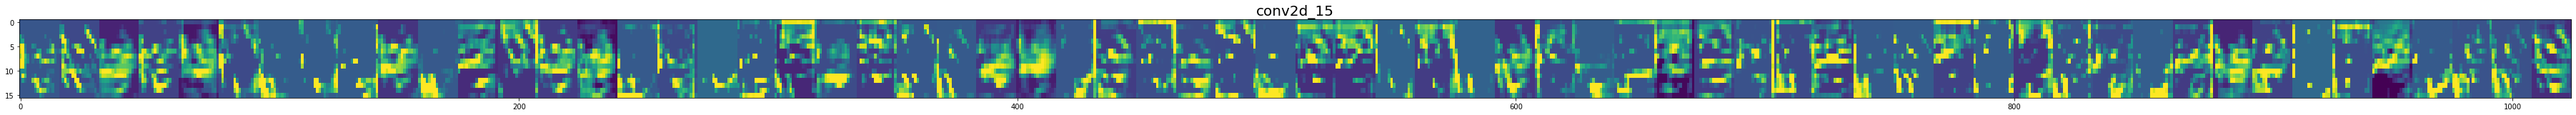

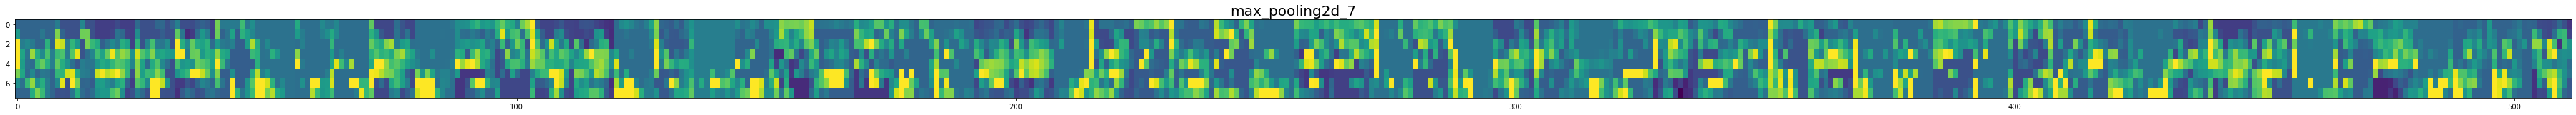

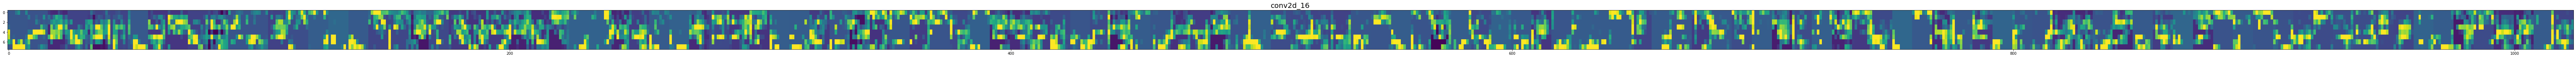

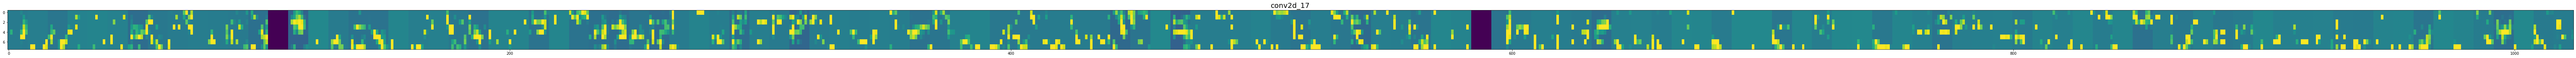

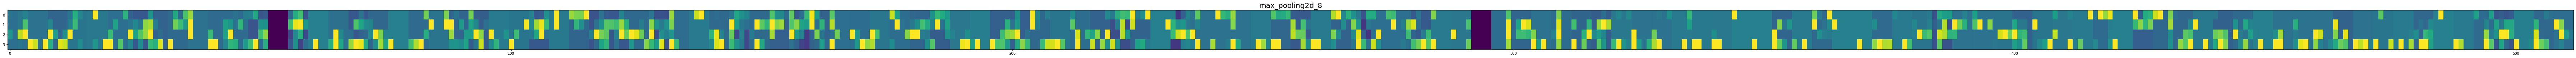

In [ ]:
# 신경망 시각화해보기
import tensorflow as tf

get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]

# 모델 전체에서 output을 가져올 수 있다.
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output)

# 테스트셋의 두 번째 데이터 : 배
test_img = np.expand_dims(x_test[1], axis = 0)
feature_maps = visual_model.predict(test_img)

for layer_name, feature_map in zip(get_layer_name, feature_maps) :
  # Dense층은 제외
  if(len(feature_map.shape) == 4) :
    img_size = feature_map.shape[1]
    features = feature_map.shape[-1]

    display_grid = np.zeros((img_size, img_size * features))

    # 각 특징맵을 display_grid 배열에 이어붙인다.
    for i in range(features) :
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std() # 정규화
      x *= 64
      x += 128 # 시각화
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * img_size : (i + 1) * img_size] = x

    plt.figure(figsize = (features, 2 + 1./features))
    plt.title(layer_name, fontsize = 20)
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

**5.3.4 과대적합 피하기**

규제화 함수 사용하기


*   tensorflow.keras.regularizers.11(1=0.01) : 가중치의 절댓값 합
*   tensorflow.keras.regularizers.12(1=0.01) : 가중치의 제곱 합
*   tensorflow.keras.regularizers.11_12(11=0.01, 12=0.01) : (혼합) 절댓값 합 + 제곱 합





In [ ]:
# CIFAR-10 규제화 함수 사용해보기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential()

# 입력 데이터는 (75, 75, 3)의 형태를 가집니다.
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256, activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

history = model.fit(x_train, y_train, epochs = 30, batch_size = 32, validation_data = (x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 292s 266ms/step - loss: 2.1048 - acc: 0.4117 - val_loss: 1.8355 - val_acc: 0.4887
Epoch 2/30
1094/1094 [==============================] - 290s 265ms/step - loss: 1.6648 - acc: 0.5479 - val_loss: 1.6244 - val_acc: 0.5601
Epoch 3/30
1094/1094 [==============================] - 291s 266ms/step - loss: 1.4593 - acc: 0.6158 - val_loss: 1.4200 - val_acc: 0.6270
Epoch 4/30
1094/1094 [==============================] - 292s 267ms/step - loss: 1.3125 - acc: 0.6643 - val_loss: 1.2827 - val_acc: 0.6680
Epoch 5/30
1094/1094 [==============================] - 289s 264ms/step - loss: 1.1981 - acc: 0.6985 - val_loss: 1.2594 - val_acc: 0.6689
Epoch 6/30
1094/1094 [==============================] - 288s 263ms/step - loss: 1.1057 - acc: 0.7257 - val_loss: 1.1686 - val_acc: 0.7009
Epoch 7/30
1094/1094 [==============================] - 306s 280ms/step - loss: 1.0259 - acc: 0.7495 - val_loss: 1.1331 - val_acc: 0.7107
Epoch 8/30
1094/1094 [============

In [ ]:
# CIFAR-10 드롭아웃 사용해보기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(245, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

history = model.fit(x_train, y_train, epochs = 30, batch_size = 32, validation_data = (x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 290s 265ms/step - loss: 1.7316 - acc: 0.3705 - val_loss: 1.4561 - val_acc: 0.4831
Epoch 2/30
1094/1094 [==============================] - 289s 264ms/step - loss: 1.3712 - acc: 0.5051 - val_loss: 1.2213 - val_acc: 0.5625
Epoch 3/30
1094/1094 [==============================] - 290s 265ms/step - loss: 1.2144 - acc: 0.5654 - val_loss: 1.1497 - val_acc: 0.5883
Epoch 4/30
1094/1094 [==============================] - 288s 263ms/step - loss: 1.1002 - acc: 0.6092 - val_loss: 1.0323 - val_acc: 0.6334
Epoch 5/30
1094/1094 [==============================] - 299s 273ms/step - loss: 1.0126 - acc: 0.6422 - val_loss: 0.9750 - val_acc: 0.6528
Epoch 6/30
1094/1094 [==============================] - 308s 281ms/step - loss: 0.9471 - acc: 0.6637 - val_loss: 0.9345 - val_acc: 0.6697
Epoch 7/30
1094/1094 [==============================] - 306s 280ms/step - loss: 0.8805 - acc: 0.6939 - val_loss: 0.8897 - val_acc: 0.6837
Epoch 8/30
1094/1094 [============

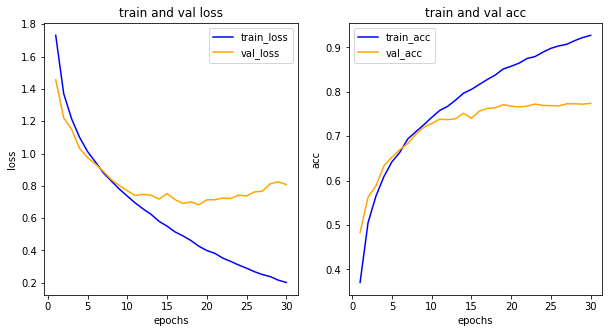

In [ ]:
# CIFAR-10 드롭아웃 그리기
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
# CIFAR-10 배치 정규화 사용해보기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(245, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

history = model.fit(x_train, y_train, epochs = 30, batch_size = 32, validation_data = (x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 290s 265ms/step - loss: 1.5827 - acc: 0.4192 - val_loss: 1.2815 - val_acc: 0.5384
Epoch 2/30
1094/1094 [==============================] - 289s 264ms/step - loss: 1.2163 - acc: 0.5615 - val_loss: 1.0720 - val_acc: 0.6213
Epoch 3/30
1094/1094 [==============================] - 292s 267ms/step - loss: 1.0337 - acc: 0.6329 - val_loss: 0.9643 - val_acc: 0.6537
Epoch 4/30
1094/1094 [==============================] - 293s 268ms/step - loss: 0.9126 - acc: 0.6789 - val_loss: 0.8969 - val_acc: 0.6811
Epoch 5/30
1094/1094 [==============================] - 291s 266ms/step - loss: 0.8241 - acc: 0.7096 - val_loss: 0.8136 - val_acc: 0.7115
Epoch 6/30
1094/1094 [==============================] - 301s 275ms/step - loss: 0.7463 - acc: 0.7371 - val_loss: 0.7627 - val_acc: 0.7301
Epoch 7/30
1094/1094 [==============================] - 303s 277ms/step - loss: 0.6862 - acc: 0.7595 - val_loss: 0.7357 - val_acc: 0.7384
Epoch 8/30
1094/1094 [============

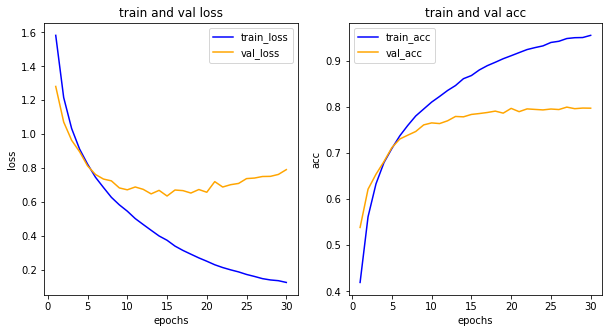

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

**5.3.5 데이터 증식 사용하기**

데이터 증식의 장점

*   다양한 데이터를 입력시킴으로써 모델을 더욱 견고하게 만들어주기 때문에 테스트 시에 더 높은 성능을 기대할 수 있다.
*   수집된 데이터가 적은 경우에 강력한 힘을 발휘한다.

이미지 제네레이터(Image Generator)가 제공하는 변환 방식

*   width_shift_range : 임의의 크기만큼 너비 방향으로 이동시킨다.
*   height_shift_range : 임의의 크기만큼 높이 방향으로 이동시킨다.
*   brightness_range : 이미지의 밝기 정도를 조정한다.
*   shear_range : 시계 반대 방향으로 밀림 강도를 조정한다.
*   zoom_range : 임의의 비율만큼 이미지를 확대/축소 시킨다.
*   rotation_range : 이미지를 임의로 회전시킨다.
*   rescale : 이미지 픽셀값의 크기를 조절한다.
*   fill_mode : 이미지 변환 시에 새로 생기는 픽셀을 채울 방법을 결정한다.
*   horizontal_flip : True일 경우, 임의로 이미지를 수평 방향으로 뒤집는다.
*   vertical_flip : True일 경우, 임의로 이미지를 수직 방향으로 뒤집는다.
*   preprocessing_function : 사용자 정의 전처리 함수 또는 전처리 함수를 적용한다.


In [ ]:
# 이미지 제네레이터를 사용하여 이미지 그려보기

from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np

train_datagen = ImageDataGenerator(horizontal_flip = True, vertical_flip = True, shear_range = 0.5, brightness_range = [0.5, 1.5], zoom_range = 0.2, width_shift_range = 0.1, height_shift_range = 0.1, rotation_range = 30, fill_mode = 'nearest')

hamburger = img_to_array(load_img('./data/hamburger.png')).astype(np.uint8)
plt.figure()
plt.imshow(hamburger)

hamburger = hamburger.reshape((1, ) + hamburger.shape)
train_generator = train_datagen.flow(hamburger, batch_size = 1)

plt.figure(figsize = (5, 5))
for i in range(9) :
  data = next(train_generator)
  image = data[0]
  plt.subplot(3, 3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(np.array(image, dtype = np.uint8), cmap = 'gray')

plt.show()

FileNotFoundError: ignored

In [ ]:
# 이미지 제네레이터를 사용하여 모델 학습하기
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trian_datagen = ImageDataGenerator(horizontal_flip = True, zoom_range = 0.2, width_shift_range = 0.1, height_shift_range = 0.1, rotation_range = 30, fill_mode = 'nearest')

val_datagen = ImageDataGenerator()

batch_size = 32

train_generator = train_datagen.flow(x_train, y_train, batch_size = batch_size)
val_generator = val_datagen.flow(x_val, y_val, batch_size = batch_size)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

def get_step(train_len, batch_size):
    if(train_len % batch_size > 0):
        return train_len // batch_size + 1
    else:
        return train_len // batch_size

history = model.fit(train_generator,
                    epochs = 100,
                    steps_per_epoch = get_step(len(x_train), batch_size),
                    validation_data = val_generator,
                    validation_steps = get_step(len(x_val), batch_size))

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

# **5.5 전이 학습**

In [ ]:
# 전이 학습 사용해보기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

# ImageNet 데이터를 학습한 모델을 불러온다.
vgg16 = VGG15(weights = 'imagenet', input_shape = (32, 32, 3), include_top = False)

model = Sequential()

model.add(vgg16)
# 분류기를 직접 정의
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary() # 모델 구조 확인

케라스가 제공하는 사전 학습된 모델을 사용하는 경우

*   weight : ImageNet 데이터를 학습시킨 가중치의 사용 여부를 결정. 기본값은 None이며, 가중치를 사용하고 싶다면 'imagenet'을 전달해야 함.
*   input_shape : 입력 데이터의 형태를 전달
*   include_top : 모델의 분류기층을 포함해서 구성할지를 결정. False를 전달할 경우, 데이터셋의 적합한 분류기를 직접 정의해주어야 함.

In [ ]:
# 모델 동결 해제하기
# 끝의 네 개 층만 동결을 해제
# 모델의 상위층(출력과 가까운 층)에서 데이터의 구체적인 특성을 학습하고, 하위층(입력과 가까운 층)에서는 단순한 특징을 학습하기 위함
for layer in vgg16.layers[:4] :
  layer.trainable = False

In [ ]:
# 전이 학습을 통해 학습하기
model = Sequential()
# vgg16 모델을 사용합니다.
model.add(vgg16)
# 분류기를 직접 정의합니다.
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation = 'softmax'))

# model.summary() # 모델의 구조를 확인하세요!

model.compile(optimizer = Adam(1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

def get_step(train_len, batch_size):
    if(train_len % batch_size > 0):
        return train_len // batch_size + 1
    else:
        return train_len // batch_size

history = model.fit(train_generator, epochs = 100, steps_per_epoch = get_step(len(x_train), batch_size), validation_data = val_generator, validation_steps = get_step(len(x_val), batch_size))